In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/varunvinodh/Downloads/module_5_starter_code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/varunvinodh/Downloads/module_5_starter_code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharm_data_complete = pd.merge(mouse_metadata, study_results, how="left")

# Display the data table for preview
pharm_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [43]:
# Checking the number of mice.
mice_count = len(pharm_data_complete["Mouse ID"].unique())
mice_count

249

In [44]:
duplicates = pharm_data_complete(["Mouse ID"]).value_counts
duplicates = duplicates[duplicates > 1].index
print(duplicates)

TypeError: 'DataFrame' object is not callable

In [80]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pharm_data_complete.drop_duplicates(subset:=['Mouse ID','Timepoint'], keep=False, inplace = True)
pharm_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [81]:
mice_count = len(pharm_data_complete["Mouse ID"].unique())
mice_count

249

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_vol = pharm_data_complete.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_vol = pharm_data_complete.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
var_vol = pharm_data_complete.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std_vol = pharm_data_complete.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
ser_vol = pharm_data_complete.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


summary_summary = pd.DataFrame({"Mean Tumor Volume": mean_vol,
                                   "Median Tumor Volume": median_vol,
                                   "Tumor Volume Variance": var_vol,
                                   "Volume Std Dev": std_vol,
                                   "Volume Std Err":ser_vol})

summary_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Volume Std Dev,Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

result = pharm_data_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'std', 'var', lambda x: np.std(x) / np.sqrt(len(x))]})
result

Tumor Volume (mm3)                                           
                           mean     median       std        var <lambda_0>
Drug Regimen                                                              
Capomulin             40.675741  41.557809  4.994774  24.947764   0.328629
Ceftamin              52.591172  51.776157  6.268188  39.290177   0.468499
Infubinol             52.884795  51.820584  6.567243  43.128684   0.490851
Ketapril              55.235638  53.698743  8.279709  68.553577   0.602252
Naftisol              54.331565  52.509285  8.134708  66.173479   0.594860
Placebo               54.033581  52.288934  7.821003  61.168083   0.579722
Propriva              52.393463  50.909965  6.568014  43.138803   0.524174
Ramicane              40.216745  40.673236  4.846308  23.486704   0.320250
Stelasyn              54.233149  52.431737  7.710419  59.450562   0.571526
Zoniferol             53.236507  51.818479  6.966589  48.533355   0.514977

<AxesSubplot:xlabel='Drug Regimen'>

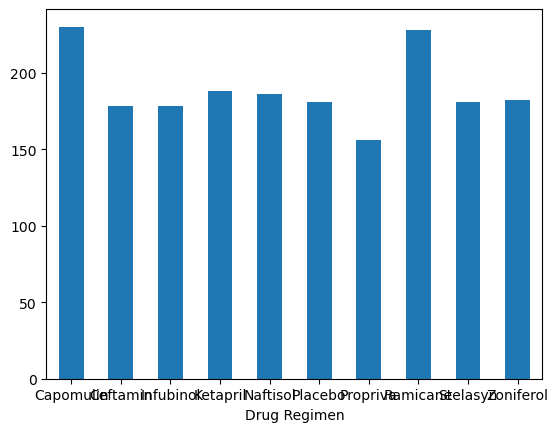

In [84]:
# group the data by 'Drug Regimen' and count the number of 'Timepoint' values
grouped_df1 =  pharm_data_complete.groupby(['Drug Regimen'])['Timepoint'].count()

# create the bar plot
grouped_df1.plot.bar(rot=0)


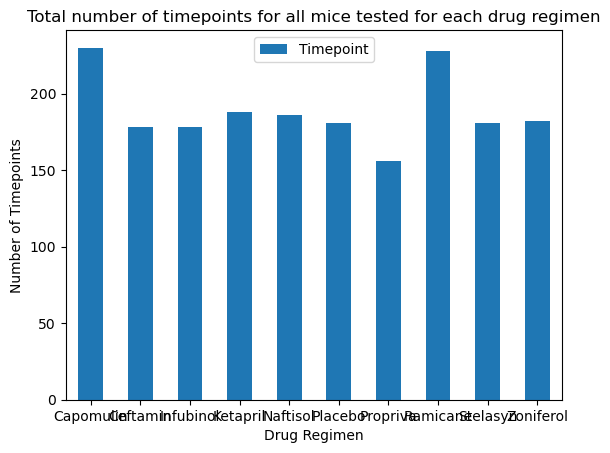

In [85]:
# group the data by 'Drug Regimen' and count the number of 'Timepoint' values
grouped_df4 = pharm_data_complete.groupby(['Drug Regimen'])['Timepoint'].count().reset_index()

# create the bar plot
grouped_df4.plot.bar(x='Drug Regimen', y='Timepoint', rot=0)

# add title and labels
plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

# show the plot
plt.show()

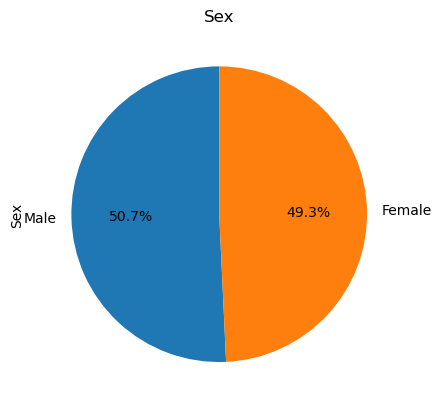

In [87]:
# Count the number of occurrences of each gender
gender_counts = pharm_data_complete['Sex'].value_counts()

# Plot the pie chart using the plot method
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Add title to the plot
title = "Sex"
_ = plt.title(title)

# Display the plot
_ = plt.show()

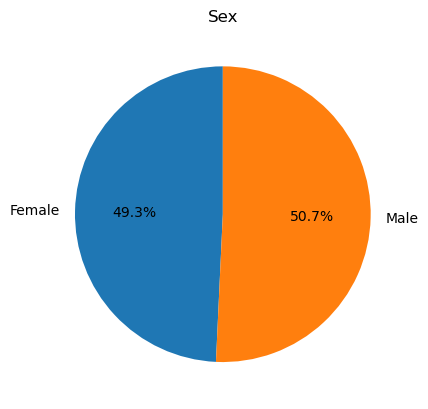

In [86]:
# Count the number of occurrences of each gender
female_mice = pharm_data_complete['Sex'].value_counts()['Female']
male_mice = pharm_data_complete['Sex'].value_counts()['Male']

# Pie chart
labels = ['Female', 'Male']
sizes = [female_mice, male_mice]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title and display the pie chart
ax.set_title("Sex")
plt.show()